<a href="https://colab.research.google.com/github/delfinamoya06/finanzas-trabajo-practico-utn-2025/blob/main/Notebook3_Analisis_tecnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Análisis de Tendencias y Backtesting (Coca-Cola) ---


[*********************100%***********************]  1 of 1 completed



Señales generadas para KO:
Price           Close       High        Low       Open    Volume     SMA_50  \
Ticker             KO         KO         KO         KO        KO              
Date                                                                          
2021-06-02  48.856762  48.909581  48.645488  48.856762  11328500  47.463067   
2021-08-12  50.413383  50.537554  50.315820  50.315820   6169200  49.257624   
2022-10-07  50.185852  50.719844  49.946479  50.627778  11479800  56.177163   
2022-12-28  58.942245  59.943626  58.868071  59.767455   7159400  56.622223   
2023-03-10  54.899635  55.761934  54.695653  55.353966  13745800  56.265411   
2023-04-17  59.291588  59.356990  58.992608  59.160784   9452400  56.438246   
2023-08-30  56.928268  57.182455  56.758811  57.088310   9447900  57.415553   
2024-01-29  57.129047  57.186436  56.593431  56.756031  14547100  56.316509   
2024-12-26  61.673145  61.840711  61.505584  61.722428   7943800  63.180622   
2025-03-12  68.937508  6

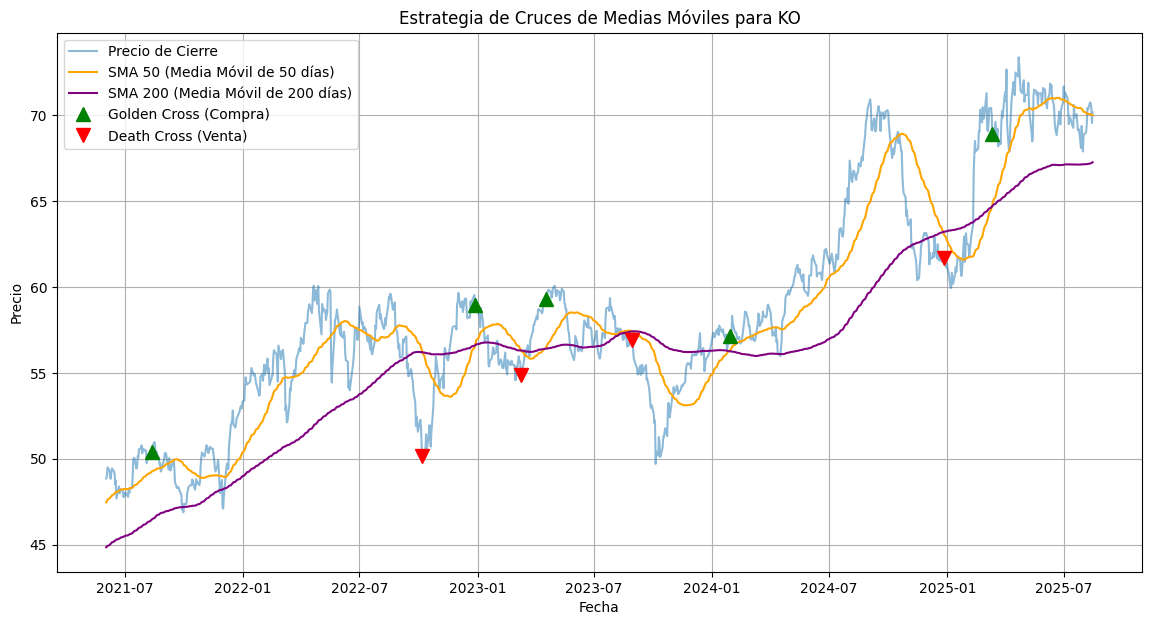

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ────────────────────────────────────────────────────────────────
# 1. ANÁLISIS DE TENDENCIAS Y ESTRATEGIA DE CRUCES
# ────────────────────────────────────────────────────────────────
print("--- 1. Análisis de Tendencias y Backtesting (Coca-Cola) ---")

# --- Configuración ---
TICKER = "KO"
PERIOD = "5y"

# --- Descargar datos ---
try:
    data = yf.download(TICKER, period=PERIOD, auto_adjust=True)
    if data.empty:
        raise ValueError("No se pudieron descargar datos para the ticker especificado.")
except Exception as e:
    print(f"Error: {e}")
    exit()

# --- Cálculo de medias móviles ---
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# ────────────────────────────────────────────────────────────────
# Identificación de Golden Cross y Death Cross
# ────────────────────────────────────────────────────────────────
data['Signal'] = 0
# Corrected to use .loc to avoid SettingWithCopyWarning
data.loc[data.index[50:], 'Signal'] = np.where(data['SMA_50'][50:] > data['SMA_200'][50:], 1, 0)
data['Position'] = data['Signal'].diff()

print(f"\nSeñales generadas para {TICKER}:")
print(data[data['Position'] != 0])

# ────────────────────────────────────────────────────────────────
# Backtesting de la estrategia vs. Buy & Hold
# ────────────────────────────────────────────────────────────────
print("\n--- Backtesting de la Estrategia de Cruces vs. Buy & Hold ---")

# Estrategia de Buy & Hold
buy_and_hold_return = (data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1

# Estrategia de Cruces
daily_returns = data['Close'].pct_change()
strategy_cumulative_return = (data['Signal'].shift(1) * daily_returns.iloc[:, 0] + 1).fillna(1).cumprod()

# Get the final scalar value for strategy return
final_strategy_return = strategy_cumulative_return.iloc[-1].item() - 1

# Format the strategy return as a string
formatted_strategy_return = f"{final_strategy_return * 100:.2f}"

# Corrección en las líneas de impresión
print(f"Retorno de la estrategia Buy & Hold: {buy_and_hold_return.item() * 100:.2f}%")
# Corrected to access the scalar value from the Series
print(f"Retorno de la estrategia de Cruces: {formatted_strategy_return}%")

if final_strategy_return > buy_and_hold_return.item():
    print("\n✅ La estrategia de cruces de medias móviles superó a la de Buy & Hold en este período.")
else:
    print("\n❌ La estrategia de cruces de medias móviles no superó a la de Buy & Hold en este período.")

print("\n" + "="*80)

# ────────────────────────────────────────────────────────────────
# Visualización de la estrategia
# ────────────────────────────────────────────────────────────────
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre', alpha=0.5)
plt.plot(data['SMA_50'], label='SMA 50 (Media Móvil de 50 días)', color='orange')
plt.plot(data['SMA_200'], label='SMA 200 (Media Móvil de 200 días)', color='purple')

# Marcar Golden Cross (compra)
plt.plot(data.loc[data['Position'] == 1.0].index,
         data['Close'][data['Position'] == 1.0],
         '^', markersize=10, color='g', lw=0, label='Golden Cross (Compra)')

# Marcar Death Cross (venta)
plt.plot(data.loc[data['Position'] == -1.0].index,
         data['Close'][data['Position'] == -1.0],
         'v', markersize=10, color='r', lw=0, label='Death Cross (Venta)')

plt.title(f'Estrategia de Cruces de Medias Móviles para {TICKER}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
%pip install ta-lib


--- 2. Análisis de Indicadores de Momentum ---

--- MACD: Divergencias y Análisis ---


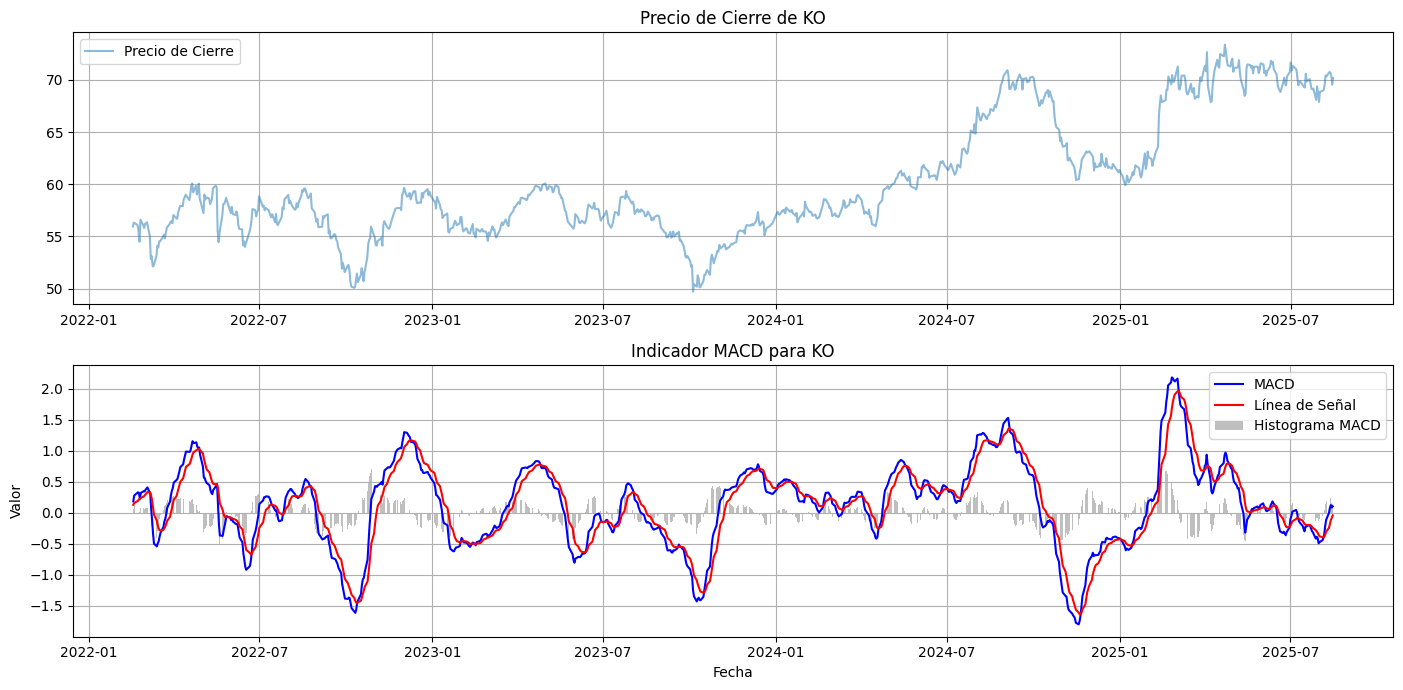


--- RSI: Niveles de Sobrecompra/Sobreventa ---


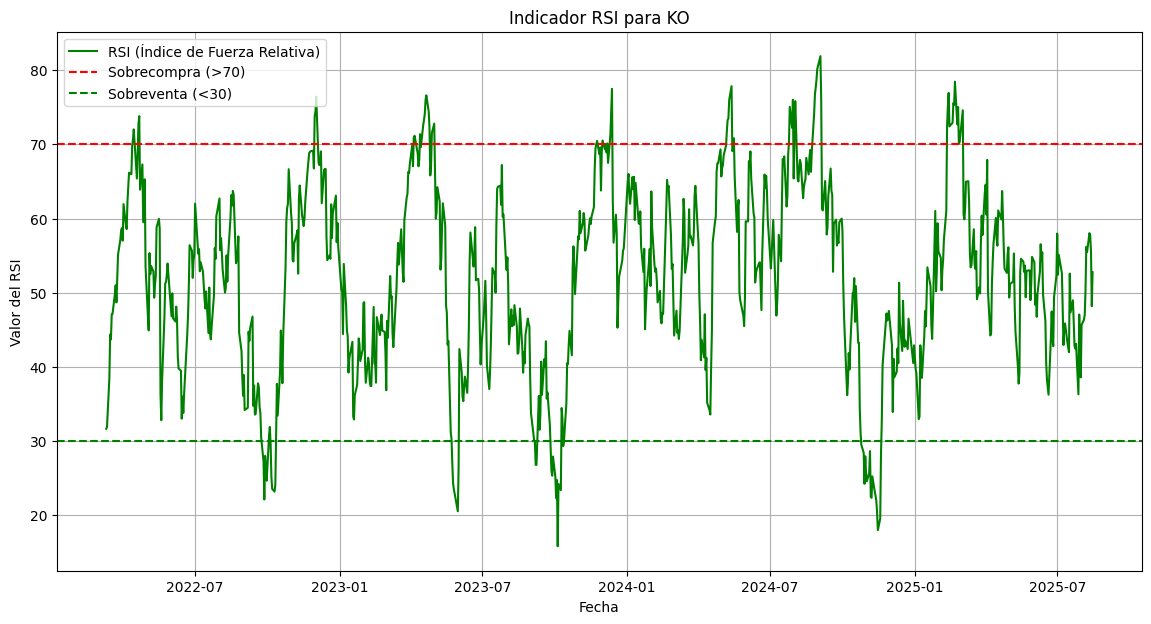


--- ADX: Fortaleza de la Tendencia ---


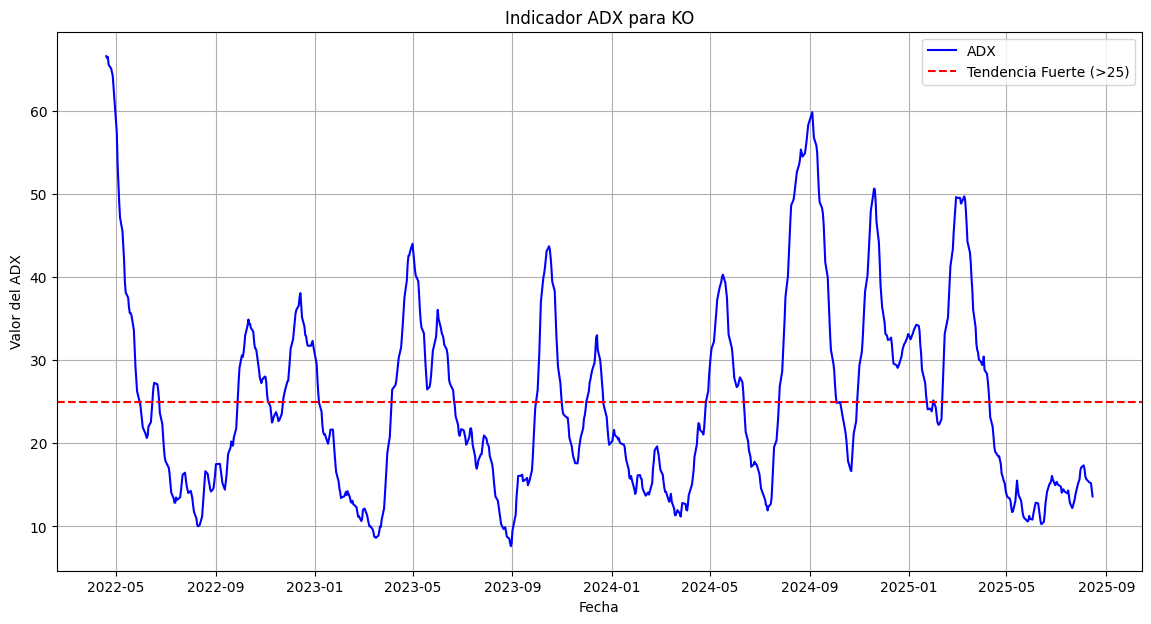


--- Optimización de Parámetros de Indicadores ---
Ejemplo de optimización para el RSI:
Retornos acumulados simulados para diferentes períodos del RSI en KO:
- RSI_7: Retorno total de -8.29%
- RSI_14: Retorno total de -17.24%
- RSI_21: Retorno total de 7.67%
- RSI_28: Retorno total de 6.86%

**Interpretación de la optimización:**
El período que genera el mayor retorno simulado es el que podría considerarse 'óptimo' para la estrategia de sobrecompra/sobreventa del RSI en este activo y período específico. Sin embargo, no garantiza el éxito futuro y debe ser parte de un análisis más amplio.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

# ────────────────────────────────────────────────────────────────
# 2. ANÁLISIS DE INDICADORES DE MOMENTUM
# ────────────────────────────────────────────────────────────────
print("\n--- 2. Análisis de Indicadores de Momentum ---")

# --- Configuración (ajusta estos parámetros) ---
TICKER = "KO"
PERIOD = "5y"

# Si el DataFrame 'data' no existe del paso anterior, descárgalo
try:
    data
except NameError:
    try:
        data = yf.download(TICKER, period=PERIOD, auto_adjust=True)
        if data.empty:
            raise ValueError("No se pudieron descargar datos para el ticker especificado.")
    except Exception as e:
        print(f"Error: {e}")
        exit()

# ────────────────────────────────────────────────────────────────
# MACD: Cálculo y análisis de divergencias
# ────────────────────────────────────────────────────────────────
print("\n--- MACD: Divergencias y Análisis ---")

# Get the underlying NumPy array and reshape to 1D
close_prices = data['Close'].values.reshape(-1)

# Cálculo del MACD, Signal y Histograma
# Pass the 1D NumPy array
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
data.dropna(inplace=True)

# Visualización del MACD
plt.figure(figsize=(14, 7))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(data['Close'], label='Precio de Cierre', alpha=0.5)
ax1.set_title(f'Precio de Cierre de {TICKER}')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(data['MACD'], label='MACD', color='blue')
ax2.plot(data['MACD_Signal'], label='Línea de Señal', color='red')
ax2.bar(data.index, data['MACD_Hist'], label='Histograma MACD', color='gray', alpha=0.5)
ax2.set_title(f'Indicador MACD para {TICKER}')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Valor')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────────────
# RSI: Identificar niveles de sobrecompra/sobreventa
# ────────────────────────────────────────────────────────────────
print("\n--- RSI: Niveles de Sobrecompra/Sobreventa ---")
# Calculation of RSI
# Pass the 1D NumPy array
data['RSI'] = talib.RSI(data['Close'].values.reshape(-1), timeperiod=14)
data.dropna(inplace=True)

# Visualization of RSI
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI (Índice de Fuerza Relativa)', color='green')
plt.axhline(70, color='red', linestyle='--', label='Sobrecompra (>70)')
plt.axhline(30, color='green', linestyle='--', label='Sobreventa (<30)')
plt.title(f'Indicador RSI para {TICKER}')
plt.xlabel('Fecha')
plt.ylabel('Valor del RSI')
plt.legend()
plt.grid(True)
plt.show()

# ────────────────────────────────────────────────────────────────
# ADX: Determinar fortaleza de tendencia
# ────────────────────────────────────────────────────────────────
print("\n--- ADX: Fortaleza de la Tendencia ---")
# Get the underlying NumPy arrays and reshape to 1D
high_prices = data['High'].values.reshape(-1)
low_prices = data['Low'].values.reshape(-1)
close_prices_adx = data['Close'].values.reshape(-1)

# Calculation of ADX
# Pass the 1D NumPy arrays
data['ADX'] = talib.ADX(high_prices, low_prices, close_prices_adx, timeperiod=14)
data.dropna(inplace=True)

# Visualization of ADX
plt.figure(figsize=(14, 7))
plt.plot(data['ADX'], label='ADX', color='blue')
plt.axhline(25, color='red', linestyle='--', label='Tendencia Fuerte (>25)')
plt.title(f'Indicador ADX para {TICKER}')
plt.xlabel('Fecha')
plt.ylabel('Valor del ADX')
plt.legend()
plt.grid(True)
plt.show()

# ────────────────────────────────────────────────────────────────
# Optimización de Parámetros (ejemplo para RSI)
# ────────────────────────────────────────────────────────────────
print("\n--- Optimización de Parámetros de Indicadores ---")
print("Ejemplo de optimización para el RSI:")

periods = [7, 14, 21, 28]
results = {}

for p in periods:
    # Calculation of RSI for optimization
    # Pass the 1D NumPy array
    data[f'RSI_{p}'] = talib.RSI(data['Close'].values.reshape(-1), timeperiod=p)
    # Estrategia: compra cuando RSI < 30 y venta cuando RSI > 70
    signals = pd.Series(0, index=data.index)
    signals[data[f'RSI_{p}'] < 30] = 1 # Buy signal
    signals[data[f'RSI_{p}'] > 70] = -1 # Sell signal

    # Calculate daily returns of the strategy in a vectorized manner
    daily_returns = data['Close'].pct_change()
    # Explicitly select the single column to ensure strategy_returns is a Series
    strategy_returns = signals.shift(1) * daily_returns.iloc[:, 0]

    # Calculate cumulative return
    # .prod() on a Series returns a scalar
    total_returns = (1 + strategy_returns.fillna(0)).prod() - 1
    results[f'RSI_{p}'] = total_returns

print(f"Retornos acumulados simulados para diferentes períodos del RSI en {TICKER}:")
for period, ret in results.items():
    # Extract the scalar value using .item() before formatting
    print(f"- {period}: Retorno total de {ret.item() * 100:.2f}%")

print("\n**Interpretación de la optimización:**")
print("El período que genera el mayor retorno simulado es el que podría considerarse 'óptimo' para la estrategia de sobrecompra/sobreventa del RSI en este activo y período específico. Sin embargo, no garantiza el éxito futuro y debe ser parte de un análisis más amplio.")


--- 3. Análisis de Volatilidad (Coca-Cola) ---


[*********************100%***********************]  1 of 1 completed



--- Bandas de Bollinger ---


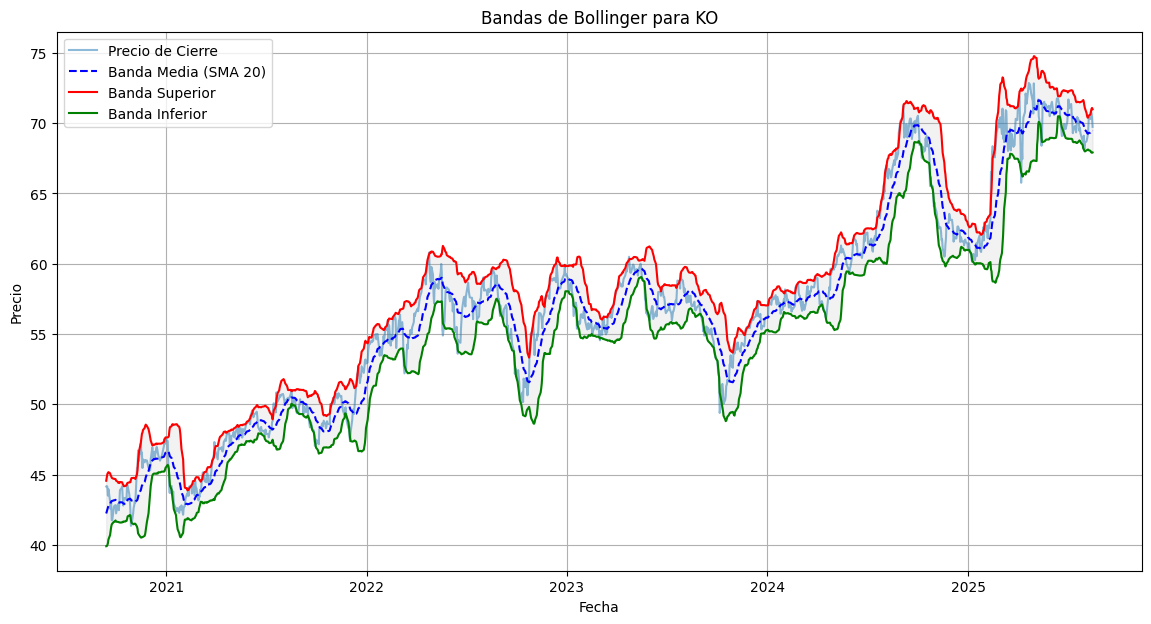

Ancho de banda promedio de las Bandas de Bollinger: 0.0657
Un ancho de banda creciente sugiere expansión de la volatilidad (tendencia fuerte).
Un ancho de banda decreciente sugiere compresión de la volatilidad (posible ruptura).

--- Porcentaje de Tiempo Fuera de Bandas ---
Puntos fuera de la banda superior: 64
Puntos fuera de la banda inferior: 67
Porcentaje de tiempo que el precio estuvo fuera de las bandas: 10.59%
Normalmente, el precio se mantiene dentro de las bandas el 95% del tiempo.

--- Señales de Compra/Venta ---
Señales de compra identificadas (precio por debajo de la banda inferior): 67
Señales de venta identificadas (precio por encima de la banda superior): 64


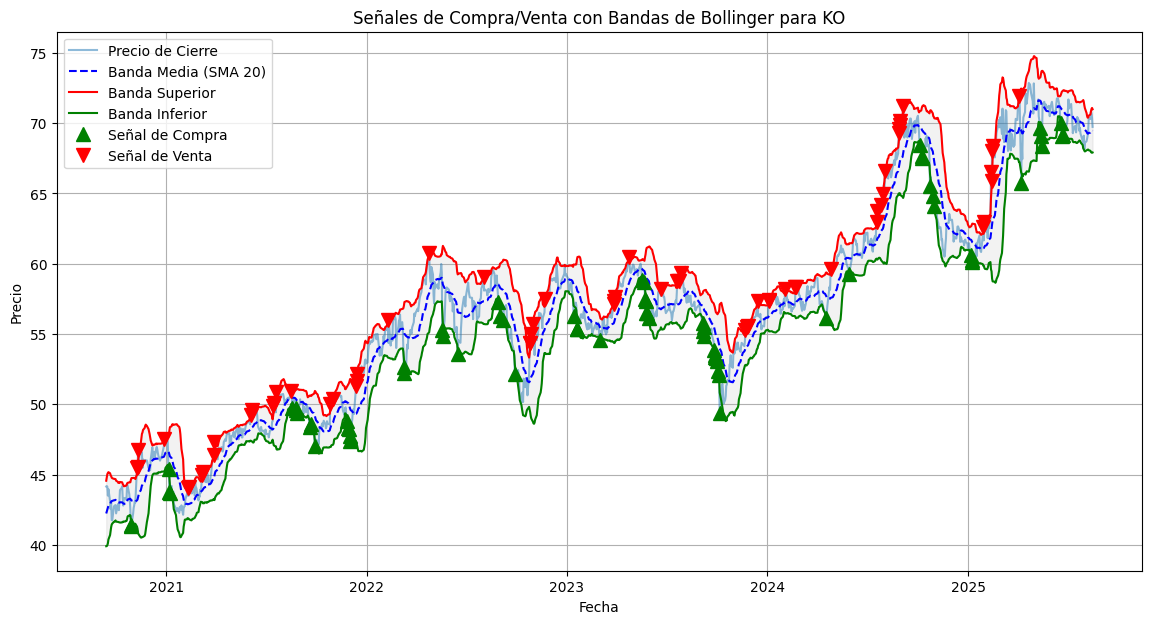


**Interpretación:**
- Una señal de compra se activa cuando el precio cruza por debajo de la banda inferior, sugiriendo sobreventa.
- Una señal de venta se activa cuando el precio cruza por encima de la banda superior, sugiriendo sobrecompra.
- Es importante combinar estas señales con otros indicadores para evitar falsos positivos.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import talib
import numpy as np # Import numpy for reshape

# ────────────────────────────────────────────────────────────────
# 3. ANÁLISIS DE VOLATILIDAD
# ────────────────────────────────────────────────────────────────
print("\n--- 3. Análisis de Volatilidad (Coca-Cola) ---")

# --- Configuración ---
TICKER = "KO"
PERIOD = "5y"

# --- Descargar datos ---
try:
    data = yf.download(TICKER, period=PERIOD, auto_adjust=True)
    if data.empty:
        raise ValueError("No se pudieron descargar datos para the ticker especificado.")
    # Ensure data has a single column level if it's multi-level
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(-1)

    # Rename columns to standard names after auto_adjust=True
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    # Remove duplicate index labels
    data = data[~data.index.duplicated(keep='first')]

except Exception as e:
    print(f"Error: {e}")
    exit()

# ────────────────────────────────────────────────────────────────
# Bandas de Bollinger: Análisis de compresión/expansión
# ────────────────────────────────────────────────────────────────
print("\n--- Bandas de Bollinger ---")
# Cálculo de las Bandas de Bollinger and add as new columns to data DataFrame
data['Upper_Band'], data['Middle_Band'], data['Lower_Band'] = talib.BBANDS(data['Close'].values.reshape(-1), timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# Drop NaN values after adding Bollinger Bands columns to ensure alignment
data.dropna(inplace=True)

# Visualización de las Bandas de Bollinger
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre', alpha=0.5)
plt.plot(data['Middle_Band'], label='Banda Media (SMA 20)', linestyle='--', color='blue')
plt.plot(data['Upper_Band'], label='Banda Superior', color='red')
plt.plot(data['Lower_Band'], label='Banda Inferior', color='green')
plt.fill_between(data.index, data['Lower_Band'], data['Upper_Band'], color='gray', alpha=0.1)
plt.title(f'Bandas de Bollinger para {TICKER}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Análisis de compresión/expansión (Ancho de Banda)
data['Band_Width'] = (data['Upper_Band'] - data['Lower_Band']) / data['Middle_Band']
average_band_width = data['Band_Width'].mean()
print(f"Ancho de banda promedio de las Bandas de Bollinger: {average_band_width:.4f}")
print("Un ancho de banda creciente sugiere expansión de la volatilidad (tendencia fuerte).")
print("Un ancho de banda decreciente sugiere compresión de la volatilidad (posible ruptura).")

# ────────────────────────────────────────────────────────────────
# Calcular % de tiempo fuera de bandas
# ────────────────────────────────────────────────────────────────
print("\n--- Porcentaje de Tiempo Fuera de Bandas ---")
# Conteo de puntos fuera de la banda superior o inferior
# Explicitly align Series before comparison
close_aligned_upper, upper_band_aligned = data['Close'].align(data['Upper_Band'], join='inner')
outside_upper = data[close_aligned_upper > upper_band_aligned].shape[0]

close_aligned_lower, lower_band_aligned = data['Close'].align(data['Lower_Band'], join='inner')
outside_lower = data[close_aligned_lower < lower_band_aligned].shape[0]

total_outside = outside_upper + outside_lower
total_points = data.shape[0]
percent_outside = (total_outside / total_points) * 100

print(f"Puntos fuera de la banda superior: {outside_upper}")
print(f"Puntos fuera de la banda inferior: {outside_lower}")
print(f"Porcentaje de tiempo que el precio estuvo fuera de las bandas: {percent_outside:.2f}%")
print("Normalmente, el precio se mantiene dentro de las bandas el 95% del tiempo.")

# ────────────────────────────────────────────────────────────────
# Identificar señales de compra/venta
# ────────────────────────────────────────────────────────────────
print("\n--- Señales de Compra/Venta ---")
# Explicitly align Series before comparison for signals
close_aligned_lower_signal, lower_band_aligned_signal = data['Close'].align(data['Lower_Band'], join='inner')
data['Buy_Signal'] = np.where(close_aligned_lower_signal < lower_band_aligned_signal, 1, 0)

close_aligned_upper_signal, upper_band_aligned_signal = data['Close'].align(data['Upper_Band'], join='inner')
data['Sell_Signal'] = np.where(close_aligned_upper_signal > upper_band_aligned_signal, -1, 0)


buy_signals = data[data['Buy_Signal'] == 1].index
sell_signals = data[data['Sell_Signal'] == -1].index

print(f"Señales de compra identificadas (precio por debajo de la banda inferior): {len(buy_signals)}")
print(f"Señales de venta identificadas (precio por encima de la banda superior): {len(sell_signals)}")

# Visualización de las señales en el gráfico
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre', alpha=0.5)
plt.plot(data['Middle_Band'], label='Banda Media (SMA 20)', linestyle='--', color='blue')
plt.plot(data['Upper_Band'], label='Banda Superior', color='red')
plt.plot(data['Lower_Band'], label='Banda Inferior', color='green')
plt.fill_between(data.index, data['Lower_Band'], data['Upper_Band'], color='gray', alpha=0.1)

# Marcar señales de compra y venta
plt.plot(buy_signals, data.loc[buy_signals]['Close'], '^', markersize=10, color='green', lw=0, label='Señal de Compra')
plt.plot(sell_signals, data.loc[sell_signals]['Close'], 'v', markersize=10, color='red', lw=0, label='Señal de Venta')

plt.title(f'Señales de Compra/Venta con Bandas de Bollinger para {TICKER}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

print("\n**Interpretación:**")
print("- Una señal de compra se activa cuando el precio cruza por debajo de la banda inferior, sugiriendo sobreventa.")
print("- Una señal de venta se activa cuando el precio cruza por encima de la banda superior, sugiriendo sobrecompra.")
print("- Es importante combinar estas señales con otros indicadores para evitar falsos positivos.")